In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb
from fi_utils import load_dataset

### Visualização dos 5 primeiros exemplos do conjunto




In [2]:
df = load_dataset()
df.head()

,Age,Overall,Preferred Foot,Skill Moves,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_float,Wage_float,Release_Clause_float,Weight_int,Height_int,Pos
0,31,94,0,4.0,RF,84.0,95.0,70.0,90.0,86.0,...,11.0,15.0,14.0,8.0,110500000.0,565000.0,226500000.0,159,170.0,Strikers
1,33,94,1,5.0,ST,84.0,94.0,89.0,81.0,87.0,...,11.0,15.0,14.0,11.0,77000000.0,405000.0,127100000.0,183,188.0,Strikers
2,26,92,1,5.0,LW,79.0,87.0,62.0,84.0,84.0,...,9.0,15.0,15.0,11.0,118500000.0,290000.0,228100000.0,150,175.0,Strikers
3,27,91,1,1.0,GK,17.0,13.0,21.0,50.0,13.0,...,85.0,87.0,88.0,94.0,72000000.0,260000.0,138600000.0,168,193.0,Defender
4,27,91,1,4.0,RCM,93.0,82.0,55.0,92.0,82.0,...,13.0,5.0,10.0,13.0,102000000.0,355000.0,196400000.0,154,180.0,Midfielder


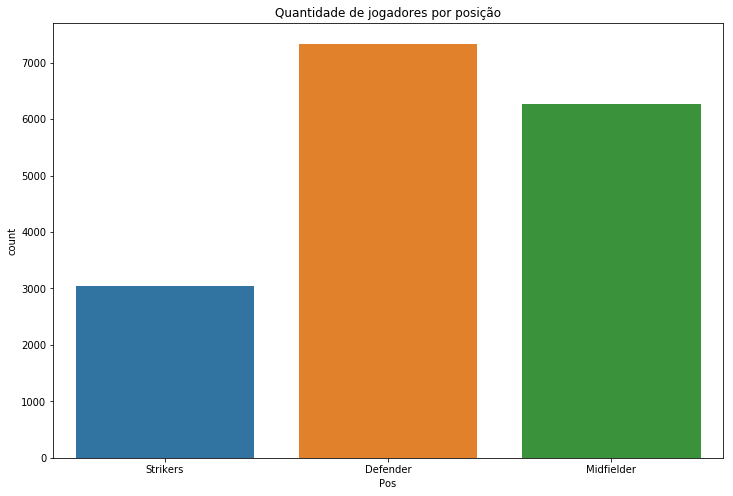

In [18]:
plt.figure(figsize=(12, 8))
plt.title("Quantidade de jogadores por posição")
plt.xlabel("Área de atuaçãos")
plt.ylabel("Quantidade de jogadores")
fig = sns.countplot(x = 'Pos', data =df)

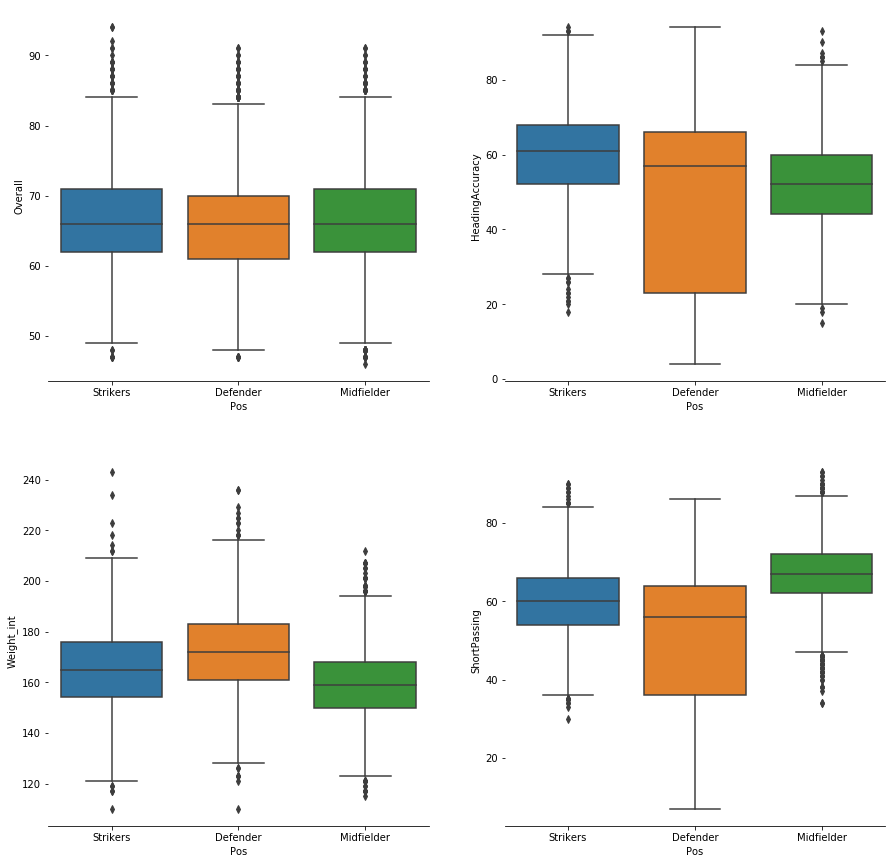

In [23]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=False)
sns.despine(left=True)
sns.boxplot('Pos', 'Overall', data = df, ax=axes[0, 0])
sns.boxplot('Pos', 'HeadingAccuracy', data = df, ax=axes[0, 1])
sns.boxplot('Pos', 'ShortPassing', data = df, ax=axes[1, 1])
sns.boxplot('Pos', 'Weight_int', data = df, ax=axes[1, 0])


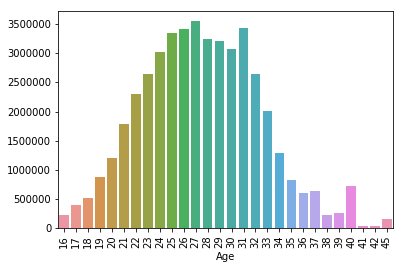

In [5]:
mean_value_per_age = df.groupby('Age')['Value_float'].mean()
p = sns.barplot(x = mean_value_per_age.index, y = mean_value_per_age.values)
p = plt.xticks(rotation=90)

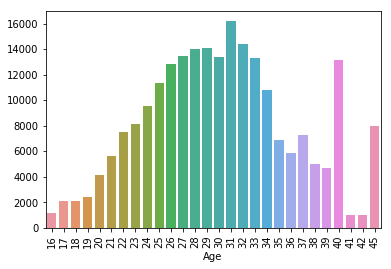

In [7]:
mean_wage_per_age = df.groupby('Age')['Wage_float'].mean()
p = sns.barplot(x = mean_wage_per_age.index, y = mean_wage_per_age.values)
p = plt.xticks(rotation=90)

Text(0.5, 0, 'Average score for racing games by platform')

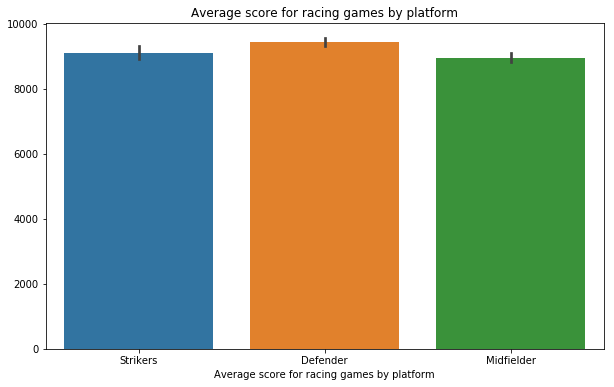

In [12]:

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average score for racing games by platform")

sns.barplot(x=df['Pos'], y=df.index)

# Add label for vertical axis
plt.xlabel("Average score for racing games by platform") # Your code here


In [ ]:


from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
lasso = linear_model.Lasso()
from sklearn.model_selection import train_test_split

le_class = preprocessing.LabelEncoder()

df['Pos'] = le_class.fit_transform(df['Pos'])

y = df["Pos"]

df.drop(columns=["Position","Pos"],inplace=True)


X_train, X_test, y_train, y_test = train_test_split(df, y, 
                                                    test_size=0.20, 
                                                    random_state=50 )
print(X_train.shape)
print(X_test.shape)

print(X_train.info())

dtrain = xgb.DMatrix(X_train, label=y_train)

dtest = xgb.DMatrix(X_test,label=y_test)

param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 50  # the number of training iterations

bst = xgb.train(param, dtrain, num_round)
bst.dump_model('dump.raw.txt')
preds = bst.predict(dtest)
preds_train = bst.predict(dtrain)


In [ ]:

best_preds = np.asarray([np.argmax(line) for line in preds])

best_preds_train = np.asarray([np.argmax(line) for line in preds_train])

cf_train = confusion_matrix(y_train, best_preds_train)

accuracy_score(y_train, best_preds_train)

cf = confusion_matrix(y_test, best_preds)

accuracy_score(y_test, best_preds)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from datetime import datetime

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.3,0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,7]
        }

In [ ]:
xgb_class = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='multi:logistic',
                    silent=True, nthread=1)

In [ ]:
folds = 10
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb_class, param_distributions=params, n_iter=param_comb, n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variab

In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)

In [ ]:
param = {'subsample': 0.8, 'min_child_weight': 10, 'max_depth': 7, 'gamma': 0.5, 'colsample_bytree': 1.0,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset

num_round = 50  # the number of training iterations

bst = xgb.train(param, dtrain, num_round)
bst.dump_model('dump.raw.txt')
preds = bst.predict(dtest)
preds_train = bst.predict(dtrain)


In [ ]:

best_preds = np.asarray([np.argmax(line) for line in preds])

best_preds_train = np.asarray([np.argmax(line) for line in preds_train])

cf_train = confusion_matrix(y_train, best_preds_train)

accuracy_score(y_train, best_preds_train)

cf = confusion_matrix(y_test, best_preds)

accuracy_score(y_test, best_preds)